# Bayesian Neural Networks (BNNs)

In this notebook a Bayesian Neural network is trained on the CFB data to take bridge parameter as input an predict the code compliance factors.

### Resources
Here you can find nice explanations: 

1. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html

The following source was used as a stating point for the implementation:

2. https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825 

### Content
1. Data Import
2. Data Pre-processing
3. Setup and Train Model
4. Model Perfromance Evaluation
5. 1D Parameter Studies


In [9]:
#import necessary libraries
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from torch.utils.data import DataLoader, TensorDataset




## 1.  Data Import 

Data is imported from the defined csv file to a pandas Data Frame.

In [10]:
# Define path to csv-file
file_path="trainingData\\1001_CFB_xy.csv"

#import data from csv file
df = pd.read_csv(file_path)
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced,eta_min_c_stresses,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses
0,0,0,14152.309743,13160.448316,671.877268,271.205192,2592.503458,27.287790,10.197769,25.263594,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,1,1,8837.220070,14326.857508,397.206564,392.509172,2174.579147,13.526673,28.214886,16.686438,...,9643.077169,0.000000,-576.609344,bot,54.0,1.004969,9751.244141,4146.510742,-349.060303,eta_y_top_stresses
2,2,2,7796.803368,10387.623139,378.608748,496.703692,2499.310838,13.184702,28.695437,26.623659,...,10211.033545,2940.897298,0.000000,top,45.0,0.736744,10312.987305,205.777237,-436.707275,eta_y_bot_stresses
3,3,3,15476.105221,16753.589316,406.201522,506.925036,4666.279702,14.948656,10.629952,23.855850,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
4,4,4,15734.234806,4752.154452,533.287170,1098.176839,2413.433684,28.295942,21.539489,29.983721,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,12675.404601,15242.173399,324.831569,613.851078,4975.947365,22.126147,11.958004,20.337492,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
9996,9996,9996,14797.994064,10913.617015,979.049978,1080.051034,3182.345390,23.641662,13.978370,23.028303,...,10449.788292,12359.866670,0.000000,bot,0.0,2.835257,10717.580078,13526.613281,-931.291443,eta_y_bot_stresses
9997,9997,9997,3812.489535,10660.380260,258.838063,1176.084953,2313.743479,21.085486,18.536990,16.966978,...,8364.845044,2527.652893,0.000000,bot,0.0,4.254149,9261.632812,45.963791,-211.776596,eta_y_bot_stresses
9998,9998,9998,8959.750469,6396.358266,815.418272,575.322936,3867.503346,18.311154,10.204305,13.407149,...,6124.513040,8107.741424,0.000000,bot,11.0,2.855744,6281.462891,4356.798828,-772.501526,eta_y_top_stresses


In [11]:
df.columns

Index(['Unnamed: 0', 'ID', 'L', 'b1', 't_p', 't_w', 'h_w', 'd1_plate',
       'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls',
       'fcc', 's', 'beta', 'h_G', 'alpha_l', 'h_v', 'l_v', 'oo', 'uu',
       'd3_plate', 'd3_walls', 'd2_walls', 'fsy', 'fsu_fac', 'esu', 'ecu',
       'gamma_E', 'phi_k', 'q_Gl', 'b_Bs', 'Q_k', 'l_sec', 'b_sec1_b1',
       'b_sec2_b1', 'h_S1_3', 'h_S7_9', 'mesh_size_factor', 'b2', 'b_sec1_b2',
       'b_sec2_b2', 'fsu', 'eta_min_s', 'x_s', 'y_s', 'z_s', 'Location_s',
       'GP_count_s', 'eta_min_c', 'x_c', 'y_c', 'z_c', 'Location_c',
       'GP_count_c', 'eta_min_shear', 'x_c_shear', 'y_c_shear', 'z_c_shear',
       'Location_c_shear', 'element_count_shear', 'eta_min_shear_reduced',
       'x_c_shear_reduced', 'y_c_shear_reduced', 'z_c_shear_reduced',
       'Location_c_shear_reduced', 'element_count_shear_reduced',
       'eta_min_c_stresses', 'x_c_stresses', 'y_c_stresses', 'z_c_stresses',
       'Location_c_stresses'],
      dtype='ob

## 2. Pre-process Data

Pre-Processing Steps
- select x and y columns (inputs and outputs)
- split data set in trianing and test set
- transform data to same range with MinMaxScaler
- transform scaled data to troch tensors

In [12]:
###### select input and ouputs ######

#x_names = ['L', 'b1',  't_p', 't_w', 'h_w'] #5 important features
x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 's', 'beta', 'h_G'] # all 16 features
# Select perfromances
y_names=['eta_min_c']


# Get relevant columns and transorm to torch tensors
x_data_df=df[x_names]
y_data_df=df[y_names]


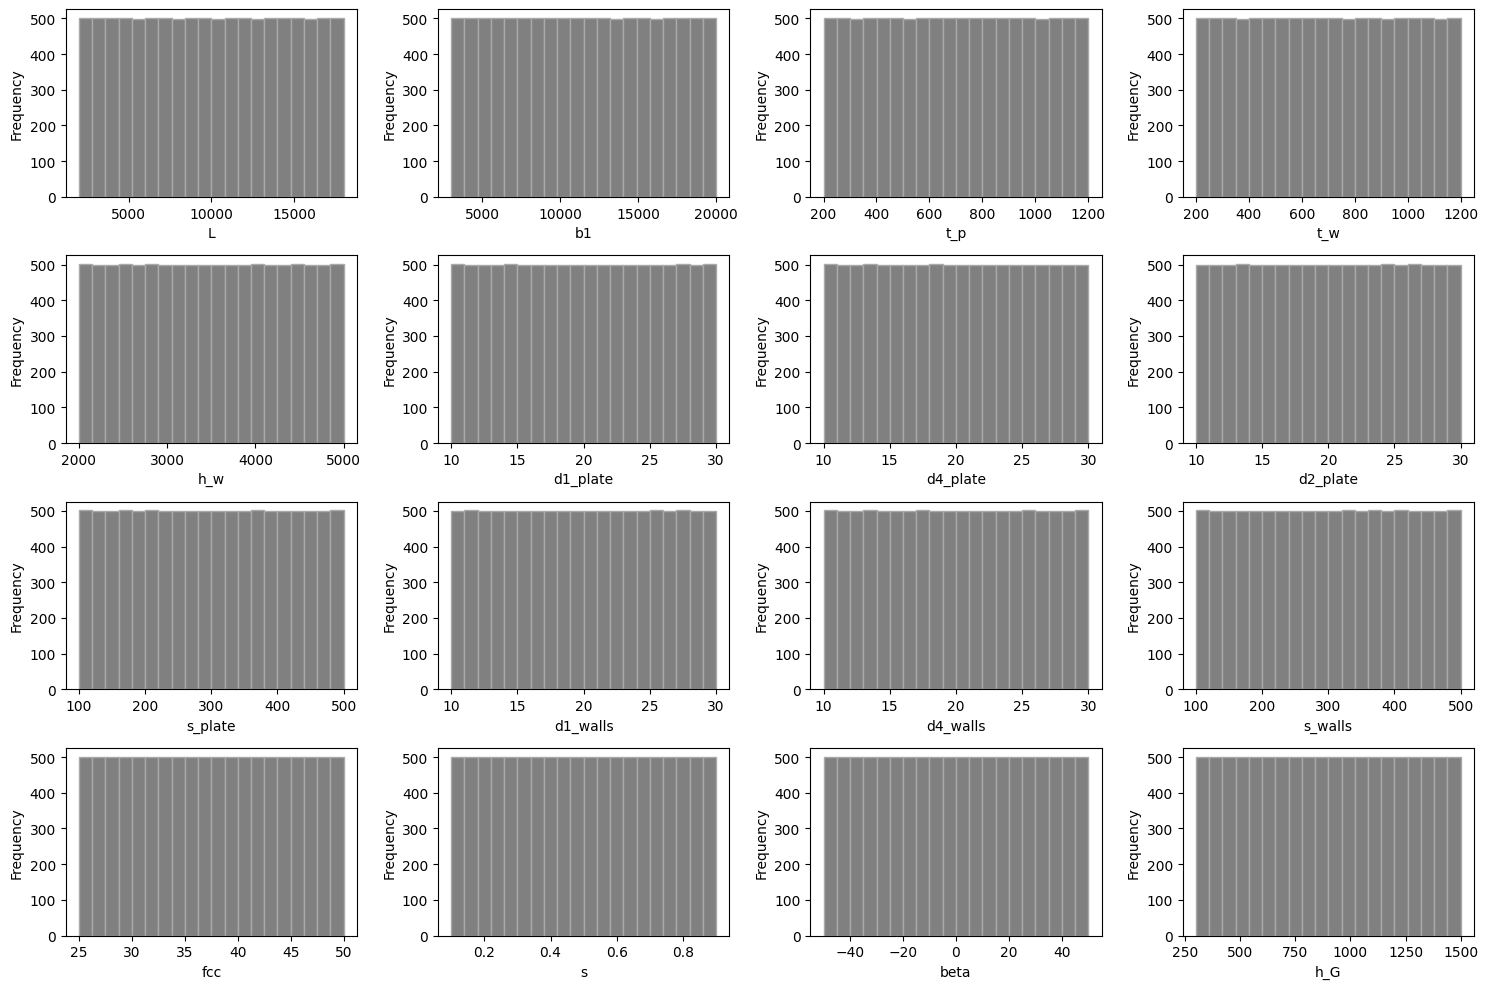

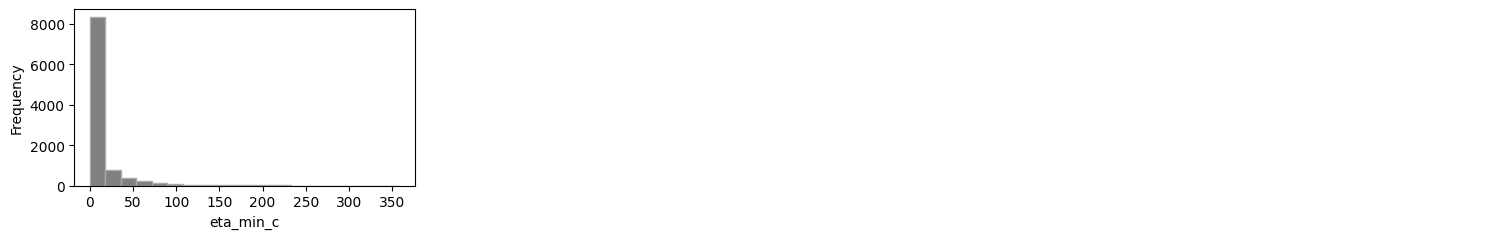

In [13]:
from plotting import hist_matrix
hist_matrix(x_data_df)
hist_matrix(y_data_df)

Training Dataset:  (6400, 16) (6400, 1)
Validation Dataset:  (1600, 16) (1600, 1)
Test Dataset:  (2000, 16) (2000, 1)


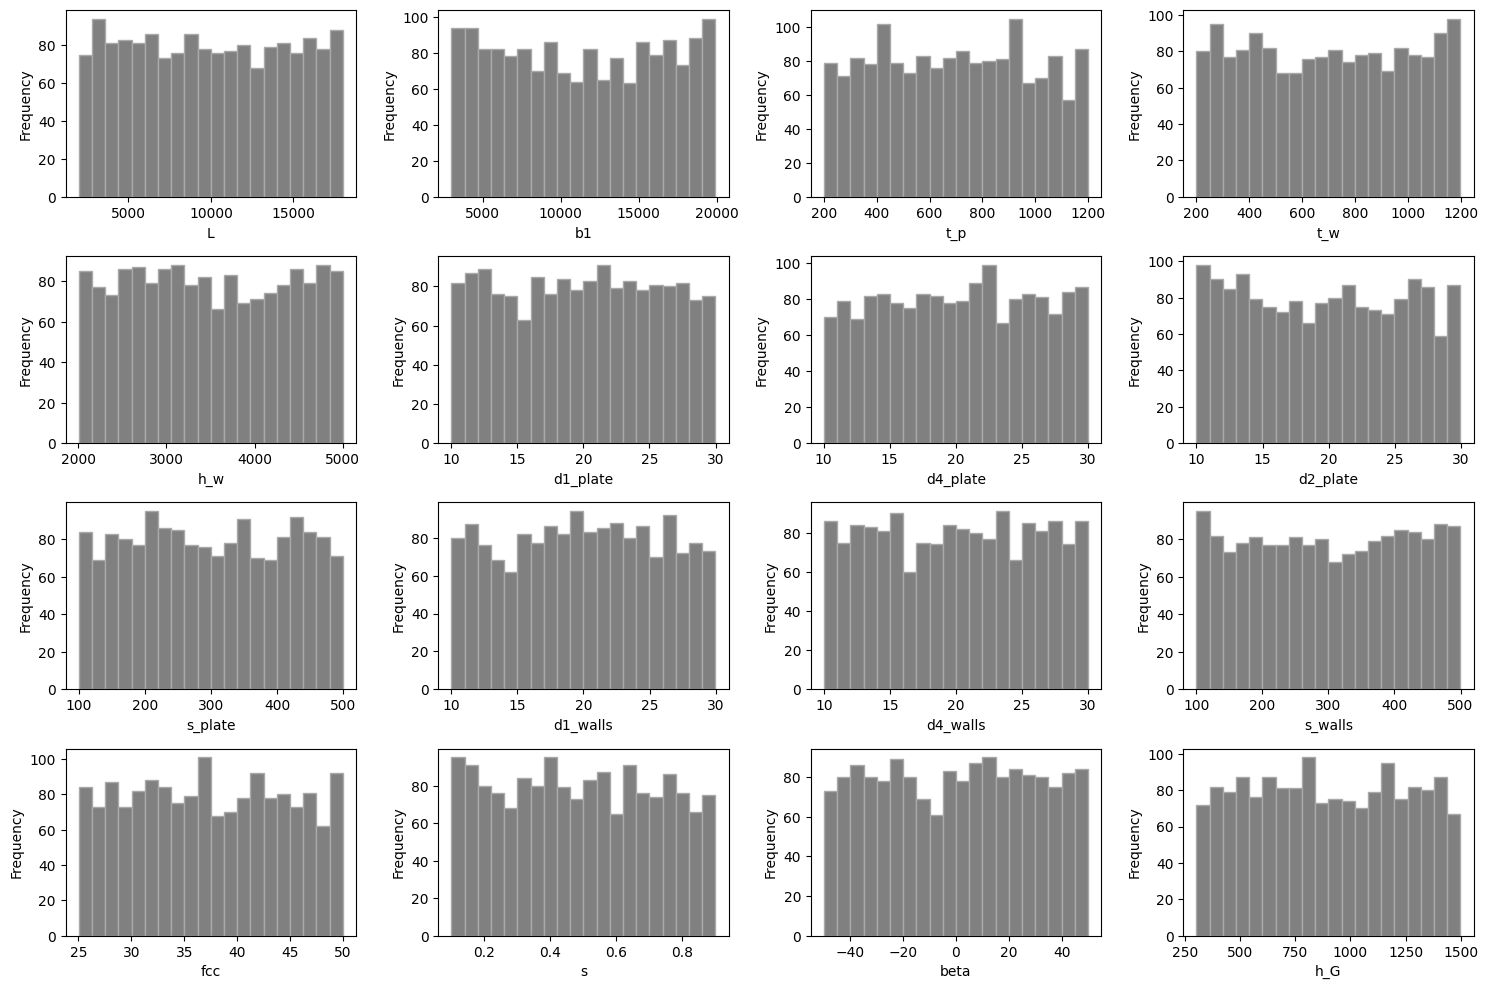

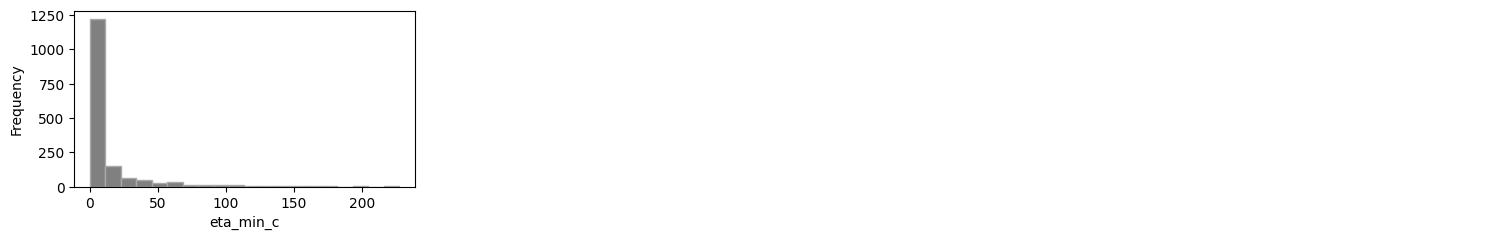

In [14]:
####### data set split #######


# split the data in training and test set
test_size = 0.2 #define test split size
x_train_full_df, x_test_df, y_train_full_df, y_test_df = train_test_split(x_data_df, y_data_df, test_size=test_size, random_state=42)

# split the training data in training and validation set
val_size = 0.2 #define val split size
x_train_df, x_val_df, y_train_df, y_val_df = train_test_split(x_train_full_df, y_train_full_df, test_size=val_size, random_state=42)

# split the data in training and test set

# transfrom to numpy arrays
x_train_np = x_train_df.values
y_train_np = y_train_df.values
x_val_np = x_val_df.values
y_val_np = y_val_df.values
x_test_np = x_test_df.values
y_test_np = y_test_df.values

#Print shapes of the splitted data sets
print('Training Dataset: ',x_train_df.shape,y_train_df.shape )
print('Validation Dataset: ',x_val_df.shape, y_val_df.shape)
print('Test Dataset: ',x_test_df.shape,y_test_df.shape)


#plot training data
hist_matrix(x_val_df)
hist_matrix(y_val_df)


In [15]:
###### Scaling of data ######

# INPUT we scale to a range 0,1
# Initialize the MinMaxScaler and fit it on the training data
# Note: MinMaxScaler  scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
# Note: MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range
# Note: MinMaxScaler is sufficient as our data is uniformily distributed for the case when we have non-uniform distirbuted data (as sampled with )

#initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# fit scaler on total data set
scaler.fit(x_data_df)

# scale training data
x_train_scaled_np = scaler.transform(x_train_df)
x_train_scaled_df=pd.DataFrame(data=x_train_scaled_np, columns=scaler.get_feature_names_out())

# Scale the validation data using the same scaler
x_val_scaled_np = scaler.transform(x_val_df)
x_val_scaled_df=pd.DataFrame(data=x_val_scaled_np, columns=scaler.get_feature_names_out())

# Scale the validation data using the same scaler
x_test_scaled_np = scaler.transform(x_test_df)
x_test_scaled_df=pd.DataFrame(data=x_test_scaled_np, columns=scaler.get_feature_names_out())

#plot scaled data
x_train_scaled_df.describe()

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,s,beta,h_G
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,0.498005,0.502608,0.498070,0.501119,0.500142,0.500351,0.495784,0.503906,0.501885,0.500685,0.499561,0.501656,0.497542,0.502634,0.499488,0.500388
std,0.286519,0.286590,0.288831,0.287781,0.287729,0.287379,0.288648,0.286804,0.290600,0.291063,0.289466,0.286489,0.289219,0.287873,0.290233,0.289131
min,0.000017,0.000000,0.000000,0.000222,0.000126,0.000129,0.000000,0.000131,0.000000,0.000000,0.000000,0.000096,0.000000,0.000075,0.000000,0.000079
25%,0.250183,0.255347,0.249695,0.252991,0.250598,0.254077,0.244463,0.257190,0.247977,0.247181,0.246539,0.252560,0.246018,0.253260,0.246744,0.249071
50%,0.498695,0.503167,0.495692,0.500814,0.501378,0.499384,0.492479,0.506774,0.504629,0.499316,0.500485,0.504073,0.499432,0.498569,0.496093,0.501902
75%,0.744232,0.750352,0.748797,0.750664,0.748302,0.748891,0.747102,0.749794,0.754620,0.756960,0.751842,0.748605,0.748960,0.752789,0.754131,0.750859
max,1.000000,0.999931,1.000000,1.000000,0.999943,1.000000,0.999656,0.999938,0.999861,0.999907,1.000000,0.999783,1.000000,0.999701,0.999844,1.000000


In [16]:
# Note instead of scaling the data here I inlcuded a mean squared log error loss in my training which has the same effect but no need for preprocessing and postprocing of training input and prediction output
# ###### Scaling of data ######

# # Y (Output) we scale with log(y)
# #m.log(y_train_np)

# # Applying y_trans=log_e(y+1) function/ transformation
# y_train_transf_np = np.log(y_train_np + 1) # log_e
# y_train_transf_df=pd.DataFrame(y_train_transf_np, columns=y_names)

# y_val_transf_np = np.log(y_val_np + 1) # log_e
# y_val_transf_df=pd.DataFrame(y_val_transf_np, columns=y_names)


# hist_matrix(y_train_transf_df)


# ##### convert to troch tensors ######

# # convert data to toch tensors (as needed format for BNN model)
# x_train_scaled_tensor=torch.tensor(x_train_scaled_df.values, dtype=torch.float32)
# y_train_transf_tensor=torch.tensor(y_train_transf_df.values, dtype=torch.float32)

# x_val_scaled_tensor=torch.tensor(x_val_scaled_df.values, dtype=torch.float32)
# y_val_transf_tensor=torch.tensor(y_val_transf_df.values, dtype=torch.float32)

In [17]:
##### convert to troch tensors ######

# convert data to toch tensors (as needed format for BNN model)
#training data
x_train_scaled_tensor=torch.tensor(x_train_scaled_df.values, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train_df.values, dtype=torch.float32)

#validation data
x_val_scaled_tensor=torch.tensor(x_val_scaled_df.values, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val_df.values, dtype=torch.float32)

#test data
x_test_scaled_tensor=torch.tensor(x_test_scaled_df.values, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test_df.values, dtype=torch.float32)


## 3. Setup and Train Model

- Define NN Architecture
- Define Losses
- Trianing Loop
- Plot loss developement during trianing
- save trained model

In [18]:
# define NN architecture
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=20),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=20),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=1),
    nn.ReLU()
)


#initialize error tracking lists
#TODO I think these need to be new initialised when the model is redefined. 
# Otherwise they should not always be initialised when the training is started. because we could have the case that a pretrained model is trainied for some more epochs.
mse_list=[]
mse_val_list=[]

msle_list=[]
msle_val_list=[]

mean_mse_list=[]
mean_mse_val_list=[]

custom_mse_list = []
custom_mse_val_list = []

rmse_list=[]
rmse_val_list=[]

kl_list=[]
kl_val_list=[]


In [123]:
##### Losses ######

# define kl weight for weighing of kl_loss in total loss function
# Note: depending which loss function are used different kl_weights should be chosen...msle is of a multiple magnitude smaller than the mse, so the kl_weight hast to also be adapter when we use that weight.
# Note: with mse loss 0.01, with msle loss 0.0001
kl_weight = 0.001
# get kl loss
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

# get mse loss
mse_loss = nn.MSELoss()

#define custom loss function
def weighted_mse_loss(predictions, targets, importance_range=(0, 5), high_weight=10):
    # Calculate the basic MSE loss
    basic_mse = (predictions - targets) ** 2

    # Apply a higher weight to errors within the specified range
    weights = torch.ones_like(targets)
    weights[(targets >= importance_range[0]) & (targets <= importance_range[1])] = high_weight

    # Calculate the weighted MSE loss
    weighted_mse = basic_mse * weights
    return weighted_mse.mean()

# mean_squared_log_error
def msle_loss(pred, targets, base='e'):
    
    if base=='e':
        pred_scaled = torch.log(pred + 1) 
        targets_scaled = torch.log(targets + 1) 
    elif base ==10 or base =='10':
        pred_scaled = torch.log10(pred + 1) 
        targets_scaled = torch.log10(targets + 1) 
    else:
        raise Exception('Invalid input for base parameter.')


    
    # Calculate the MSE loss
    msle = ((pred_scaled - targets_scaled ) ** 2).mean()

    return msle

#get optimizer
learning_rate=0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [126]:
# define epochs, and the training data, and the batch size
epochs = 50
batch_size = 32
# Shuffle is set to True to randomize the order of training data at each epoch

train_dataset = TensorDataset(x_train_scaled_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# x = x_train_scaled_tensor
# y = y_train_transf_tensor
with_stochasticPrediction=False

#training loop
for step in range(epochs):
    
    model.train()

    epoch_mse = []
    epoch_msle = []
    epoch_custom_mse = []
    epoch_rmse = []
    epoch_kl = []

    for x, y in train_loader:
        y_pred = model(x)

        if with_stochasticPrediction:
            y_pred_mean_np, y_pred_std_np, y_pred_n_times=bnn_predict_with_uncertainty(model, x, n=100)
            y_pred_mean_tensor=torch.tensor(y_pred_mean_np, dtype=torch.float32)
            mean_mse = mse_loss(y_pred_mean_tensor, y)
            mean_mse_list.append(mean_mse.item())
            
        #standard mse, rmse loss
        mse = mse_loss(y_pred, y)
        epoch_mse.append(mse.item())
        # mse_list.append(mse.item())
        rmse = torch.sqrt(mse)
        epoch_rmse.append(rmse.item())

        #msle los
        msle = msle_loss(y_pred, y,base='10')
        epoch_msle.append(msle.item())
        # msle_list.append(msle.item())

        # Custom weighted MSE loss
        custom_mse = weighted_mse_loss(y_pred, y, importance_range=(0.1, 3), high_weight=100)
        epoch_custom_mse.append(custom_mse.item())
        # custom_mse_list.append(custom_mse.item())

        #kl_divergence loss
        kl = kl_loss(model)
        epoch_kl.append(kl.item())
        # kl_list.append(kl.item())

        # Add individual losses weighted to single loss
        cost = rmse + kl_weight*kl
        cost_log=msle + kl_weight*kl
        cost_custom = custom_mse + kl_weight*kl
        
        optimizer.zero_grad()
        cost_custom.backward()
        optimizer.step()

    # Calculate mean losses for the epoch (on training data) and save in loss lists
    mse_list.append(np.mean(epoch_mse))
    rmse_list.append(np.mean(epoch_rmse))
    msle_list.append(np.mean(epoch_msle))
    custom_mse_list.append(np.mean(epoch_custom_mse))
    kl_list.append(np.mean(epoch_kl))

    # Calculate validation loss calculation and save in loss tracking lists
    model.eval()
    with torch.no_grad():
        y_val_pred = model(x_val_scaled_tensor)

        #standard mse, rmse loss
        mse_val = mse_loss(y_val_pred, y_val_tensor)
        mse_val_list.append(mse_val.item())
        rmse_val = torch.sqrt(mse_val)
        rmse_val_list.append(rmse_val.item())

        #msle los
        msle_val = msle_loss(y_val_pred, y_val_tensor, base='10')
        msle_val_list.append(msle_val.item())

        # Custom weighted MSE loss
        custom_mse_val = weighted_mse_loss(y_val_pred, y_val_tensor, importance_range=(0, 4), high_weight=10)
        custom_mse_val_list.append(custom_mse_val.item())


    #verbalise
    if step % 50 == 0:
        if with_stochasticPrediction:
            print(f'Step {step}, MSE: {mse.item():.2f}, Mean MSE: {mean_mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, Custom MSE: {custom_mse.item():.2f}',
                  f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Custom MSE: {custom_mse_val.item():.2f}')
        else: 
            print(f'Step {step}, MSE: {mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, Custom MSE: {custom_mse.item():.2f}',
                  f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Custom MSE: {custom_mse_val.item():.2f}')
    


print('Training is finished. The final losses:') 
if with_stochasticPrediction:
    print(f'Step {step}, MSE: {mse.item():.2f}, Mean MSE: {mean_mse.item():.2f}, MSLE: {msle.item():.2f},KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, Custom MSE: {custom_mse.item():.2f}',
          f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Custom MSE: {custom_mse_val.item():.2f}')
else:
    print(f'Step {step}, MSE: {mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, Custom MSE: {custom_mse.item():.2f}',
          f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Custom MSE: {custom_mse_val.item():.2f}')

Step 0, MSE: 23.49, MSLE: 0.04, KL: 24.16, RMSE: 4.85, Custom MSE: 28.05 Val MSE: 26.77, Val MSLE: 0.04, Val RMSE: 5.17, Val Custom MSE: 38.20
Training is finished. The final losses:
Step 49, MSE: 23.55, MSLE: 0.02, KL: 31.77, RMSE: 4.85, Custom MSE: 24.91 Val MSE: 21.79, Val MSLE: 0.04, Val RMSE: 4.67, Val Custom MSE: 29.73


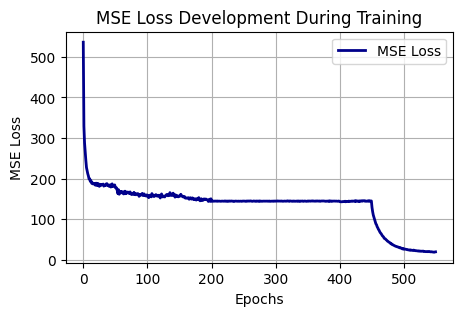

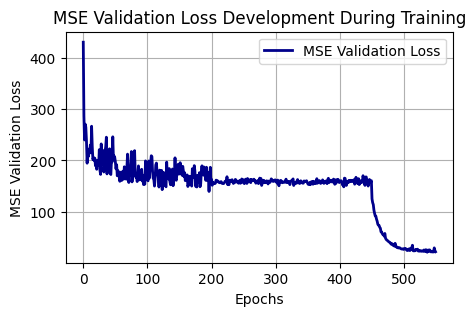

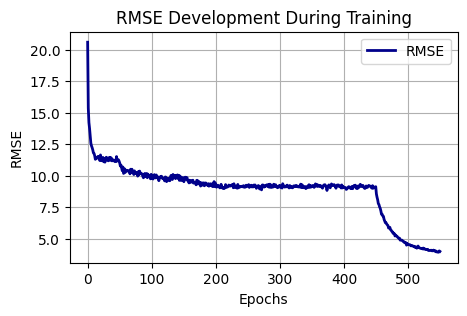

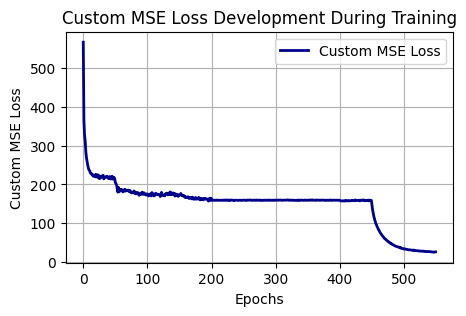

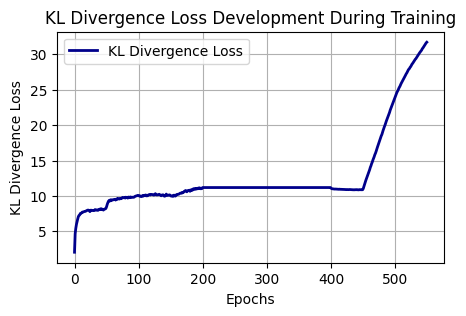

In [128]:
from plotting import plot_loss_development

loss_lists = [mse_list, mse_val_list, rmse_list, custom_mse_list, kl_list]
# loss_lists = [mse_list, mean_mse_list, kl_list, rmse_list, custom_mse_list]
loss_names = ['MSE Loss', 'MSE Validation Loss', 'RMSE', 'Custom MSE Loss', 'KL Divergence Loss',]
# loss_names = ['MSE Loss', 'Mean MSE Loss', 'KL Divergence Loss', 'RMSE', 'Custom MSE Loss']

# Define a path to save the plots, if needed
save_path = 'trainedModels' # Example path, change it as needed

plot_loss_development(loss_lists, loss_names, save_path, color='darkblue', model_name='TestModel', figsize=(5, 3))

In [129]:
####### save model #######
# define model name
name_training_run='RunTestShort'

#saving the whole model
torch.save(model, 'trainedModels\\'+name_training_run+'.pth')

#saving just the weights and biases
#torch.save(model.state_dict(), 'trainedModels\\'+name_training_run+'.pth')

## 4. Model evaluation
- load model
- On training data:

    a. evaluate prediction perfromance

    b. evaluate uncertanty calibration

- On validation data:

    a. evaluate prediction perfromance

    b. evaluate uncertanty calibration

- On test data: 

    a. evaluate prediction perfromance

    b. evaluate uncertanty calibration
    


In [130]:
## load a model
name_training_run='RunTestShort'
model = torch.load('trainedModels\\'+name_training_run+'.pth')

model.eval() # sets the model to evaluation mode, which affects layers like dropout and batch normalization that behave differently during training and inference.
model

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=1, bias=True)
  (5): ReLU()
)

In [131]:
from plotting import plot_true_vs_pred, single_para_strudy_perf
from MLmodel import bnn_predict_with_uncertainty, calculate_rmse, filter_values_within_range

### On the training data

In [132]:
##### make predictions ####3
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_train_mean_pred_np, y_train_std_pred_np, y_train_pred_n_times = bnn_predict_with_uncertainty(model, x_train_scaled_tensor, n=n_predictions, log_transform_back=False)
# print('Mean Predictions: ', y_train_mean_pred_np)
# print('Standard Deviation of Predictions: ', y_train_std_pred_np)

Text(0, 0.5, 'Probability density')

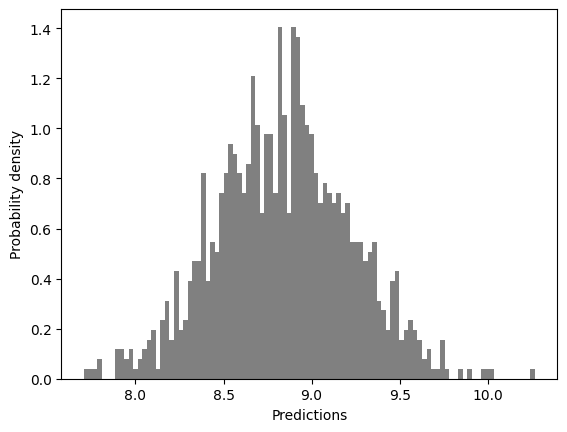

In [133]:
#plot predictive distribution
sample=1

y_train_pred_n_times

fig, ax = plt.subplots()
num_bins = 100
# the histogram of the actual error distribution
n, bins, patches = ax.hist(y_train_pred_n_times[sample].flatten(), num_bins, density=True, label='Observed histogram', color='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Probability density')

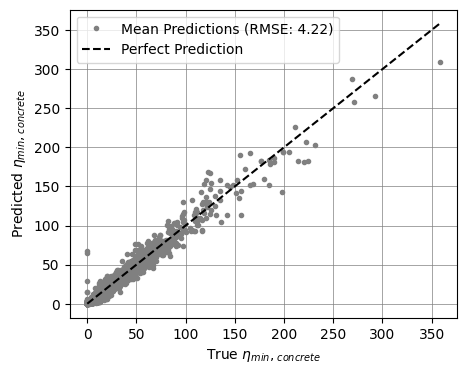

In [134]:
###### Calulate Metrics and Plot #######

# Calculate rmse
rmse_train = calculate_rmse(y_train_np, y_train_mean_pred_np)
# print("Root Mean Squared Error (RMSE):", rmse_train)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=y_train_np, y_pred=y_train_mean_pred_np, rmse_value=rmse_train, y_name='$\eta_{min},_{concrete}$' )

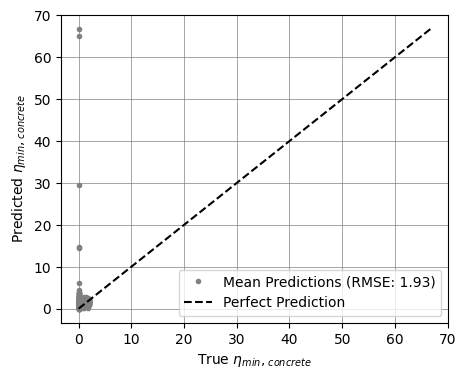

In [135]:
###### Calulate Metrics and Plot: For Critical Range #######

# Define the range
lower_bound = 0
upper_bound = 2

filtered_y_train_np, filtered_y_train_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=lower_bound, ub=upper_bound)

# Calculate rmse
rmse_train_filtered = calculate_rmse(filtered_y_train_np, filtered_y_train_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=filtered_y_train_np, y_pred=filtered_y_train_mean_pred_np, rmse_value=rmse_train_filtered, 
                    y_name='$\eta_{min},_{concrete}$' )



Text(0, 0.5, 'Probability density')

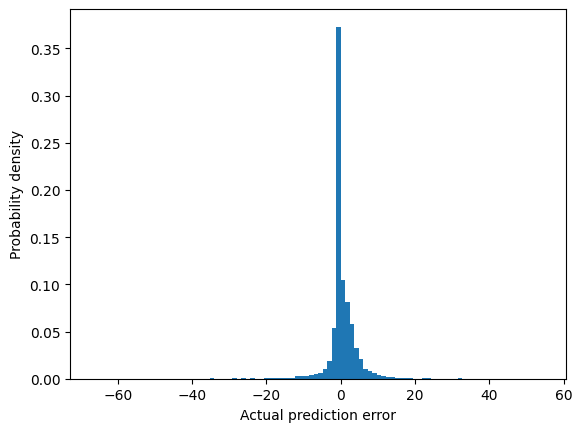

In [136]:
# calculating errors of the average model and plot them
errors=y_train_np - y_train_mean_pred_np

fig, ax = plt.subplots()
num_bins = 100
# the histogram of the actual error distribution
n, bins, patches = ax.hist(errors.flatten(), num_bins, density=True, label='Observed histogram')
ax.set_xlabel('Actual prediction error')
ax.set_ylabel('Probability density')

In [137]:
# Evaluation of Uncertanty Calibration 

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Define a range of confidence levels
confidence_levels = np.linspace(0, 1, 100)
coverages = []

# Compute prediction intervals (e.g., 95% confidence intervals) (Assumption that the predictive distribution is a normal dirtsibution)
for confidence_level in confidence_levels:
    z = norm.ppf((1 + confidence_level) / 2)  # z-score for the confidence level
    prediction_intervals = np.array([
        [meanPred - z * std, meanPred + z * std]
        for meanPred, std in zip(y_train_mean_pred_np, y_train_std_pred_np)
    ])

    # Check if actual values fall within prediction intervals
    within_intervals = np.array([
        interval[0] <= y_true <= interval[1]
        for interval, y_true in zip(prediction_intervals, y_train_np)
    ])
    
    # Proportion of times actual values fall within prediction intervals
    coverage = np.mean(within_intervals)
    coverages.append(coverage)

print(coverages)

[0.00015625, 0.00109375, 0.0015625, 0.00234375, 0.00296875, 0.00375, 0.00484375, 0.005625, 0.00640625, 0.00734375, 0.00828125, 0.0090625, 0.01, 0.01078125, 0.0115625, 0.0125, 0.01390625, 0.0146875, 0.0153125, 0.01609375, 0.01703125, 0.01765625, 0.01890625, 0.01921875, 0.0203125, 0.02125, 0.02328125, 0.02421875, 0.0246875, 0.025, 0.0265625, 0.02703125, 0.0275, 0.0278125, 0.02859375, 0.02953125, 0.03015625, 0.03078125, 0.03109375, 0.0321875, 0.033125, 0.03421875, 0.035, 0.0365625, 0.03734375, 0.03859375, 0.03953125, 0.03984375, 0.04046875, 0.04171875, 0.0428125, 0.04375, 0.045, 0.04625, 0.04703125, 0.04765625, 0.04828125, 0.04953125, 0.05, 0.050625, 0.05140625, 0.05234375, 0.05328125, 0.0540625, 0.0553125, 0.05609375, 0.05734375, 0.058125, 0.059375, 0.06171875, 0.06265625, 0.06421875, 0.06578125, 0.0665625, 0.06734375, 0.068125, 0.07, 0.07203125, 0.07421875, 0.0759375, 0.07796875, 0.08015625, 0.08203125, 0.08484375, 0.0871875, 0.0890625, 0.0921875, 0.09484375, 0.09828125, 0.10140625, 0.1

C:\Users\kuhnso\AppData\Local\Temp\ipykernel_16580\3755510431.py:14: RuntimeWarning: invalid value encountered in multiply
  [meanPred - z * std, meanPred + z * std]


In [140]:
from sklearn.metrics import mean_squared_error
# Calculate Brier score
brier_score = mean_squared_error(confidence_levels, coverages)
print("Brier score:", brier_score)

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(confidence_levels - coverages))
print("Expected Calibration Error (ECE):", ece)

# Calculate Total Calibration Error (TCE)
tce = np.sum(np.abs(confidence_levels - coverages))
print("Total Calibration Error (TCE):", tce)

# Calculate Bias (Positive for Overconfidence, Negative for Underconfidence)
bias = np.sum(confidence_levels - coverages)
print("Calibration Bias:", bias)

Brier score: 0.2621842678806292
Expected Calibration Error (ECE): 0.44237187500000014
Total Calibration Error (TCE): 44.23718750000001
Calibration Bias: 44.236875000000005


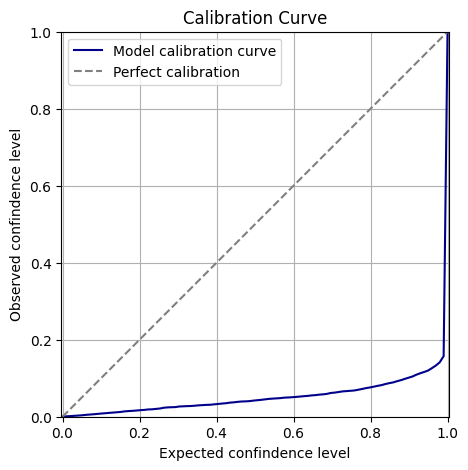

In [141]:
# Plot the calibration curve
plt.figure(figsize=(5, 5))
plt.plot(confidence_levels, coverages,  label='Model calibration curve', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration',color='gray')
# plt.plot(p_pred, p_obs, label='Model calibration curve')
# plt.plot([0,1],[0,1], 'k--', alpha=0.6, label='Ideal calibration curve')
plt.xlabel('Expected confindence level')
plt.ylabel('Observed confindence level')
plt.title('Calibration Curve')
plt.axis('equal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.grid(True)
plt.show()

In [103]:
# # TODO: Implementation in a function of uncertanty calibration calulation 
# # BUT for some reason this runs 2 minutes, while the not function code runs 10 seconds...correct this 
# # the results seem to be the same...

# import numpy as np
# from scipy.stats import norm

# # Define the function to calculate a confidence interval for a normal distribution
# def calc_confidence_interval_snorm(confidence_level, mean_pred, std_pred):
#     z = norm.ppf((1 + confidence_level) / 2)  # z-score for the confidence level
#     confidence_interval = [mean_pred - z * std_pred, mean_pred + z * std_pred]

#     return confidence_interval

# # Define the function to calculate the cobserved confidence level (coverage)
# def calc_observed_confidence(confidence_level, y_pred_mean, y_pred_std, y_true):
#     confidence_intervals = np.array([
#         calc_confidence_interval_snorm(confidence_level, mean_pred, std_pred)
#         for mean_pred, std_pred in zip(y_pred_mean, y_pred_std)
#     ])

#     # Check if actual values fall within prediction intervals
#     within_intervals = np.array([
#         interval[0] <= true_val <= interval[1]
#         for interval, true_val in zip(confidence_intervals, y_true)
#     ])

#     coverage = np.mean(within_intervals)
#     return coverage



# # Define a range of confidence levels
# confidence_levels = np.linspace(0, 1, 100)
# coverages = []

# # Compute prediction intervals and check coverage
# for confidence_level in confidence_levels:
#     coverage = calc_observed_confidence(confidence_level, y_train_mean_pred_np, y_train_std_pred_np, y_train_np)
#     coverages.append(coverage)

# print("Coverages for each confidence level:", coverages)

In [104]:
# from fitter import Fitter
#Idea: with current uncertanty callibaration we assume a stand. normal distribution for our model predictions to calculate the confidence interval
# one could also do this more accurately, so fit a distribution to the predicted distributin and calculate confidence intervalls from that distribution
# or take the n predictions, and find (iteratively) the confidence intervals (timeconsuming?)

# f = Fitter(y_train_pred_n_times[1],
#            distributions=['gamma',
#                           'lognorm',
#                           "beta",
#                           "burr",
#                           "norm"])
# f.fit()
# f.summary()
# f.get_best(method = 'sumsquare_error')

#### on the validation data:

In [142]:
##### make predictions ####
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_val_mean_pred_np, y_val_std_pred_np, y_val_pred_n_times = bnn_predict_with_uncertainty(model, x_val_scaled_tensor, n=n_predictions,log_transform_back=False)
y_val_mean_pred_np

array([[ 0.16773358],
       [ 0.16774507],
       [ 7.7815886 ],
       ...,
       [47.322235  ],
       [ 1.6159213 ],
       [66.25293   ]], dtype=float32)

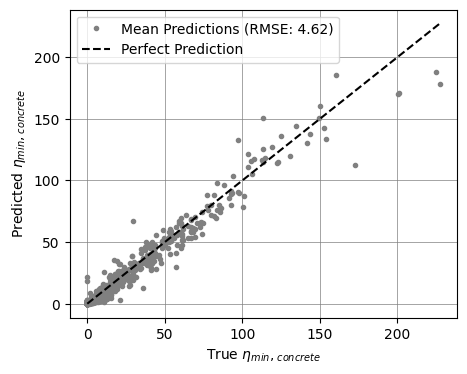

In [143]:
###### Calulate Metrics and Plot #######

# Calculate rmse
rmse_val = calculate_rmse(y_val_np, y_val_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=y_val_np, y_pred=y_val_mean_pred_np, rmse_value=rmse_val, y_name='$\eta_{min},_{concrete}$' )

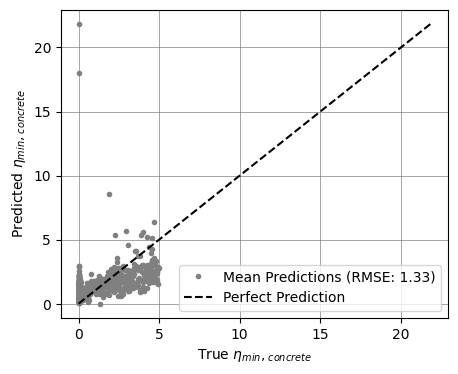

In [144]:
###### Calulate Metrics and Plot: For Critical Range #######

# Define the range
lower_bound = 0
upper_bound = 5

filtered_y_val_np, filtered_y_val_mean_pred_np=filter_values_within_range(y_true=y_val_np, y_pred=y_val_mean_pred_np, lb=lower_bound, ub=upper_bound)

# Calculate rmse
rmse_val_filtered = calculate_rmse(filtered_y_val_np, filtered_y_val_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=filtered_y_val_np, y_pred=filtered_y_val_mean_pred_np, rmse_value=rmse_val_filtered, 
                    y_name='$\eta_{min},_{concrete}$' )

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Define a range of confidence levels
confidence_levels = np.linspace(0, 1, 100)
coverages = []

# Compute prediction intervals (e.g., 95% confidence intervals) (Assumption that the predictive distribution is a normal dirtsibution)
for confidence_level in confidence_levels:
    z = norm.ppf((1 + confidence_level) / 2)  # z-score for the confidence level
    prediction_intervals = np.array([
        [meanPred - z * std, meanPred + z * std]
        for meanPred, std in zip(y_val_mean_pred_np, y_val_std_pred_np)
    ])

    # Check if actual values fall within prediction intervals
    within_intervals = np.array([
        interval[0] <= y_true <= interval[1]
        for interval, y_true in zip(prediction_intervals, y_val_np)
    ])
    
    # Proportion of times actual values fall within prediction intervals
    coverage = np.mean(within_intervals)
    coverages.append(coverage)

print(coverages)

[0.0, 0.000625, 0.0025, 0.003125, 0.005625, 0.00625, 0.006875, 0.0075, 0.008125, 0.009375, 0.01125, 0.0125, 0.0125, 0.0125, 0.013125, 0.01375, 0.015, 0.015625, 0.016875, 0.016875, 0.0175, 0.018125, 0.01875, 0.01875, 0.019375, 0.02, 0.02, 0.02125, 0.0225, 0.023125, 0.025, 0.025625, 0.025625, 0.02625, 0.02625, 0.026875, 0.028125, 0.02875, 0.029375, 0.03, 0.030625, 0.03375, 0.034375, 0.035625, 0.03625, 0.036875, 0.038125, 0.03875, 0.039375, 0.040625, 0.041875, 0.043125, 0.044375, 0.044375, 0.045, 0.045625, 0.046875, 0.046875, 0.0475, 0.04875, 0.05, 0.050625, 0.0525, 0.05375, 0.054375, 0.05625, 0.056875, 0.058125, 0.058125, 0.058125, 0.05875, 0.05875, 0.06, 0.0625, 0.06625, 0.066875, 0.06875, 0.069375, 0.07375, 0.074375, 0.076875, 0.0775, 0.08125, 0.0825, 0.085625, 0.08875, 0.089375, 0.093125, 0.095625, 0.1, 0.10375, 0.106875, 0.109375, 0.11125, 0.115625, 0.120625, 0.12875, 0.138125, 0.149375, 0.999375]


C:\Users\kuhnso\AppData\Local\Temp\ipykernel_16580\3651735814.py:14: RuntimeWarning: invalid value encountered in multiply
  [meanPred - z * std, meanPred + z * std]


In [146]:
from sklearn.metrics import mean_squared_error
# Calculate Brier score
brier_score = mean_squared_error(confidence_levels, coverages)
print("Brier score:", brier_score)

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(confidence_levels - coverages))
print("Expected Calibration Error (ECE):", ece)

# Calculate Total Calibration Error (TCE)
tce = np.sum(np.abs(confidence_levels - coverages))
print("Total Calibration Error (TCE):", tce)

# Calculate Bias (Positive for Overconfidence, Negative for Underconfidence)
bias = np.sum(confidence_levels - coverages)
print("Calibration Bias:", bias)

Brier score: 0.2639588300847012
Expected Calibration Error (ECE): 0.4435812500000001
Total Calibration Error (TCE): 44.35812500000001
Calibration Bias: 44.35812500000001


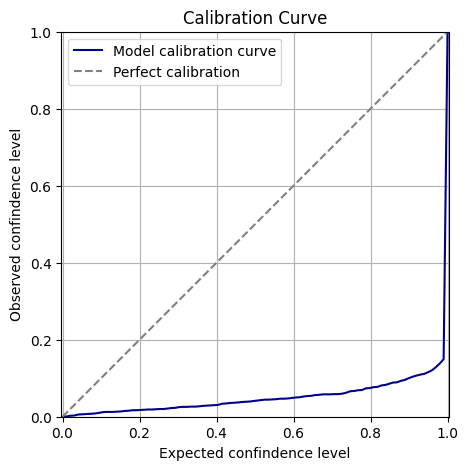

In [147]:
# Plot the calibration curve
plt.figure(figsize=(5, 5))
plt.plot(confidence_levels, coverages,  label='Model calibration curve', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration',color='gray')
# plt.plot(p_pred, p_obs, label='Model calibration curve')
# plt.plot([0,1],[0,1], 'k--', alpha=0.6, label='Ideal calibration curve')
plt.xlabel('Expected confindence level')
plt.ylabel('Observed confindence level')
plt.title('Calibration Curve')
plt.axis('equal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.grid(True)
plt.show()

#### on test data

In [148]:
##### make predictions ####
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_test_mean_pred_np, y_test_std_pred_np, y_test_pred_n_times = bnn_predict_with_uncertainty(model, x_test_scaled_tensor, n=n_predictions,log_transform_back=False)
y_test_mean_pred_np

array([[ 0.16789702],
       [ 0.16778125],
       [12.951772  ],
       ...,
       [22.784935  ],
       [ 1.7078191 ],
       [ 0.6233674 ]], dtype=float32)

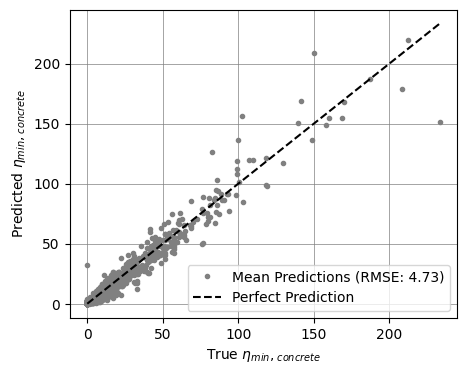

In [149]:
###### Calulate Metrics and Plot #######

# Calculate rmse
rmse_test = calculate_rmse(y_test_np, y_test_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=y_test_np, y_pred=y_test_mean_pred_np, rmse_value=rmse_test, y_name='$\eta_{min},_{concrete}$' )

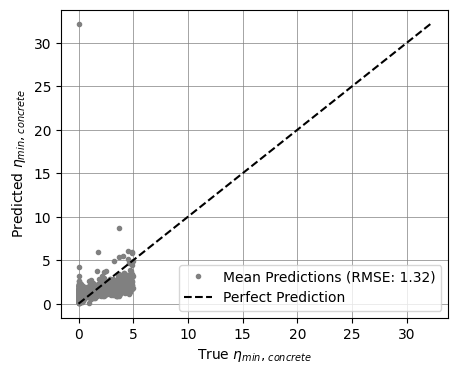

In [150]:
###### Calulate Metrics and Plot: For Critical Range #######

# Define the range
lower_bound = 0
upper_bound = 5

filtered_y_test_np, filtered_y_test_mean_pred_np=filter_values_within_range(y_true=y_test_np, y_pred=y_test_mean_pred_np, lb=lower_bound, ub=upper_bound)

# Calculate rmse
rmse_test_filtered = calculate_rmse(filtered_y_test_np, filtered_y_test_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=filtered_y_test_np, y_pred=filtered_y_test_mean_pred_np, rmse_value=rmse_test_filtered, 
                    y_name='$\eta_{min},_{concrete}$' )

## 5.  1D Parameter study validation

Here we plot the 1D paraemter studies calculated with the parameteric NLFE-Analysis-Pipeline against the mean prediction of the trained BNN model. Additionally we plot the uncertanty of the prediction.



In [151]:
def plot_1DParameter_ValidationStudy(df,mean_pred, std_pred, var_par,  unit, idx_s, eta):
    cm = 1/2.54

    fig, ax = plt.subplots(figsize=(25*cm,15*cm))

    #Bending
    ax.plot(df[var_par], df[eta], label='Concrete NLFE-Analysis', marker='x', color='black')

    #Prediction
    ax.plot(df[var_par], mean_pred[:,0], label='Concrete Mean Model \nPrediction', marker='.', color='green')

    #Confidence
    ax.fill_between(df[var_par], mean_pred[:,0] - 3*std_pred[:,0], mean_pred[:,0] + 3*std_pred[:,0], label = "99.7% Confidence interval \nConcrete", color = "green", alpha = 0.3)

    #TODO later if we have also shear and reinforcement eta model plot all in one (only ms=1)??
    # #Shear
    # ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear'],label='Shear stress (ms=1t)', marker='o', color='orangered')
    # ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear_reduced'],label='Shear stress within bounds   \n(ms=1t)', marker='o', color='deeppink')

    ax.set(xlabel=var_par+unit, ylabel='$\eta \ min$ [-]',
        title='Concrete Frame Bridge, Studie {}'.format(idx_s))


    # upper_lim = 25
    # ax.set_ylim(bottom=0,top=upper_lim)
    ax.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\eta=1$')

    ax.set_xticks(df[var_par])
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=45)

    #ax.set_yticks(np.linspace(0,upper_lim,11))

    ax.grid()
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    fig.tight_layout()

In [152]:
def validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta, n_predictions=100):

    # get 1D parameter study data
    xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s,idx_s)
    df_xy=pd.read_csv(xy_file_name)
    #print(df_xy)

    #Extract features
    x_df=df_xy[x_names]

    #Scale them
    x_scaled_np = scaler.transform(x_df)
    x_scaled_df=pd.DataFrame(data=x_scaled_np, columns=scaler.get_feature_names_out())

    #transform into tensor
    x_1D_tensor=torch.tensor(x_scaled_df.values, dtype=torch.float32)

    ##### make predictions ####
    # Perfrom multiple predictions on data --> get mean and std for each data point
    val_mean_pred_1d, val_std_pred_1d, y_val_pred_n_times_1d = bnn_predict_with_uncertainty(model, x_1D_tensor, n=n_predictions)


    #plot
    plot_1DParameter_ValidationStudy(df=df_xy,mean_pred=val_mean_pred_1d, std_pred=val_std_pred_1d, var_par=var_par,  unit=unit, idx_s=idx_s, eta=eta)

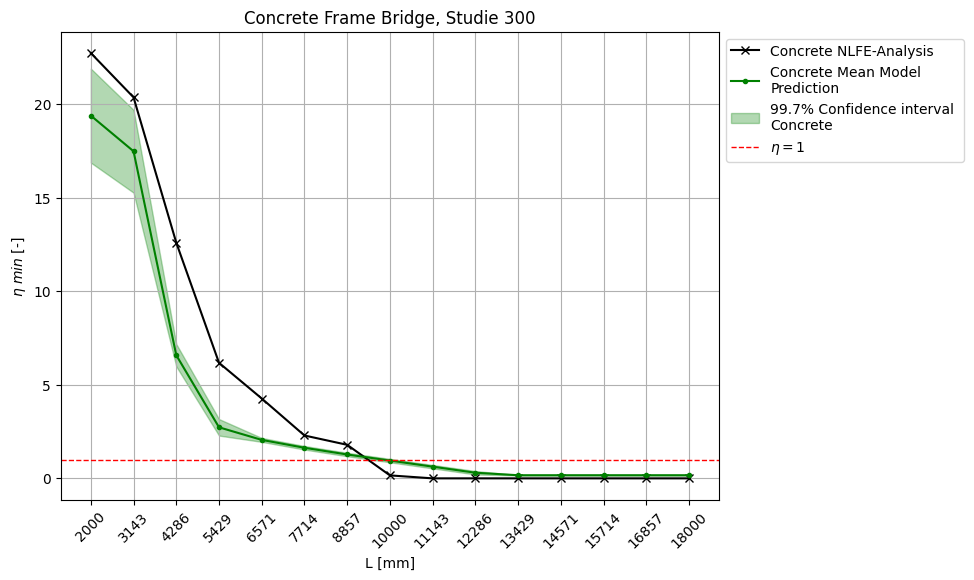

In [153]:
idx_s=300
var_par='L'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

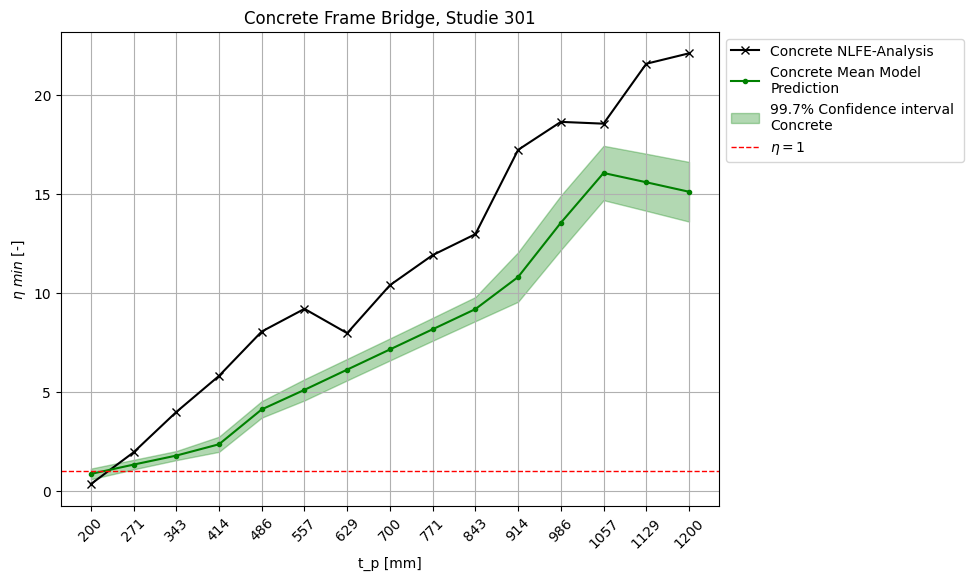

In [154]:
idx_s=301
var_par='t_p'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

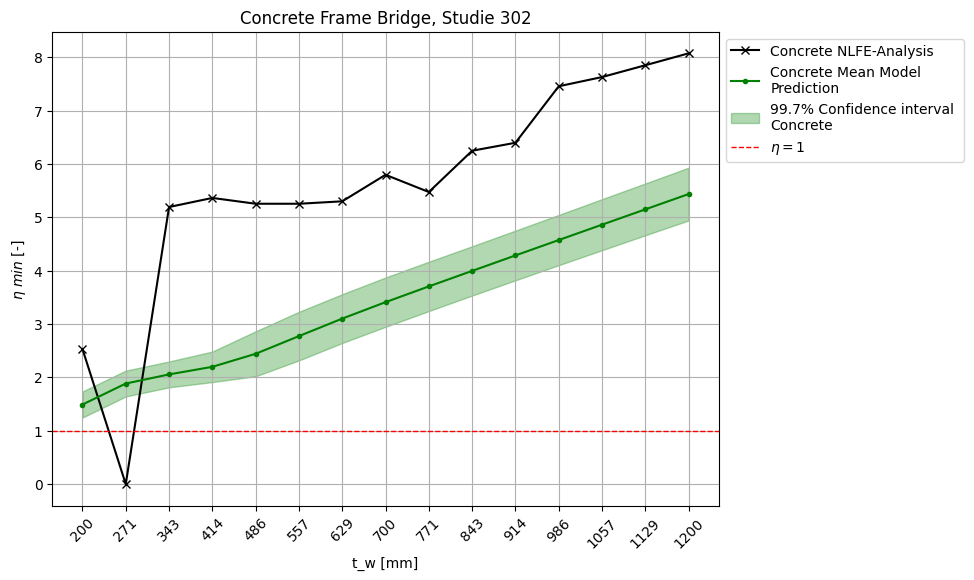

In [155]:
idx_s=302
var_par='t_w'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

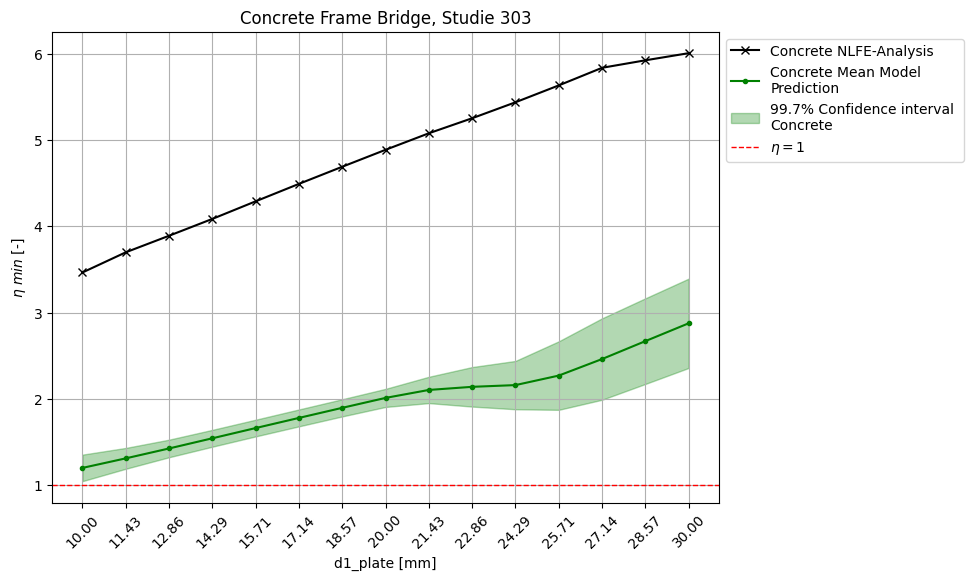

In [156]:
idx_s=303
var_par='d1_plate'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

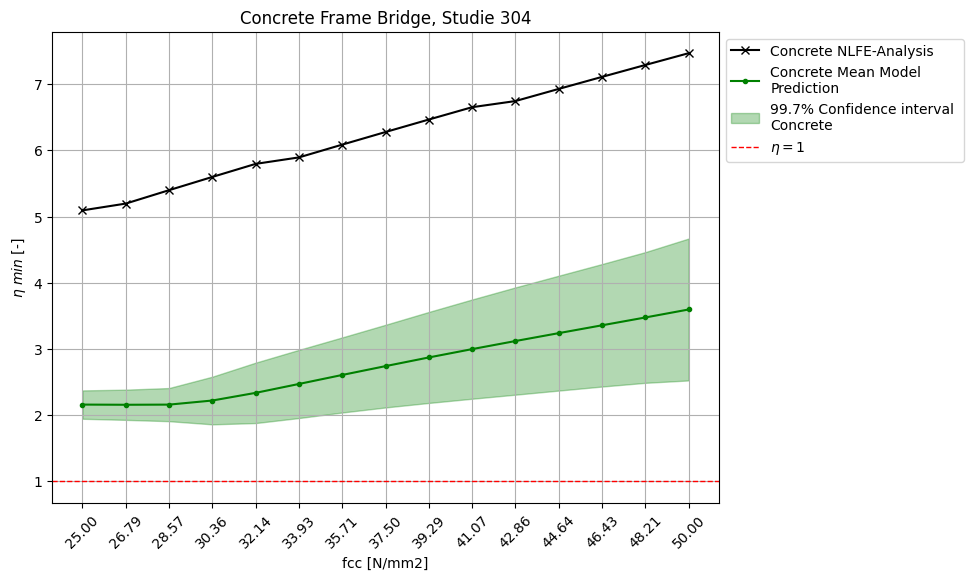

In [157]:
idx_s=304
var_par='fcc'
unit=' [N/mm2]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

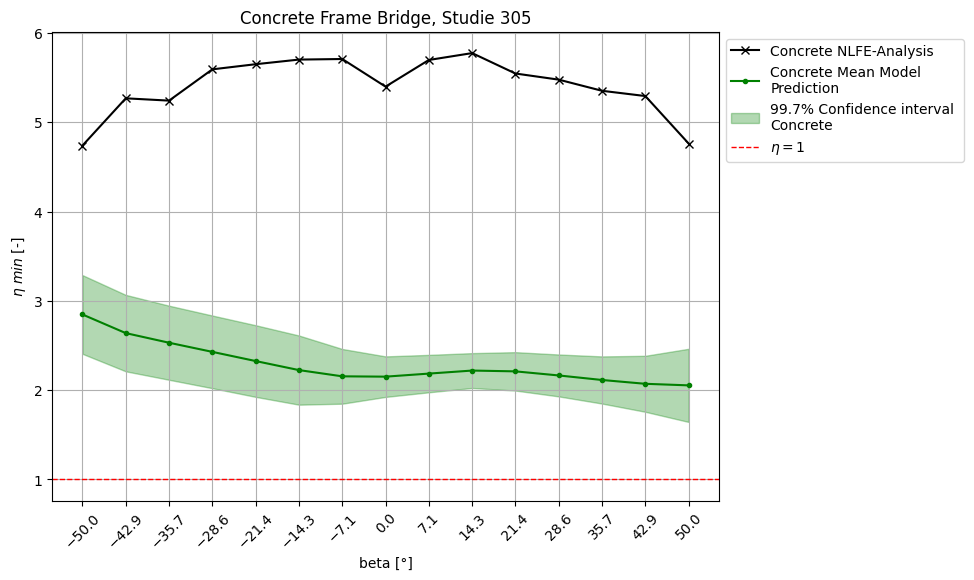

In [158]:
idx_s=305
var_par='beta'
unit=' [°]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

# FROM HERE below noch nicht aufgeräumt

In [59]:
idx_s1=305

step='step_4'
var_par='beta'
unit=' [mm]'

df_xy_1=None

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s1,idx_s1)

df_xy_1=pd.read_csv(xy_file_name)
df_xy_1

,Unnamed: 0,ID,beta,L,b1,t_p,t_w,h_w,alpha_l,h_v,...,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced,eta_min_c_stresses,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses
0,0,0,-50.000000,5800,9720,400,400,2780,90,0,...,178.2,5221.8,0.0,bot,3,2.655827,75.316185,5324.683594,-352.941162,eta_y_bot_stresses
1,1,1,-42.857143,5800,9720,400,400,2780,90,0,...,178.2,5221.8,0.0,bot,4,2.916380,75.316185,5118.916016,-352.941162,eta_y_bot_stresses
2,2,2,-35.714286,5800,9720,400,400,2780,90,0,...,891.0,5221.8,0.0,bot,4,2.897423,3488.683838,75.316185,-352.941162,eta_y_bot_stresses
3,3,3,-28.571429,5800,9720,400,400,2780,90,0,...,1960.2,5221.8,0.0,bot,0,3.070467,3845.083740,75.316185,-352.941162,eta_y_bot_stresses
4,4,4,-21.428571,5800,9720,400,400,2780,90,0,...,2673.0,5221.8,0.0,bot,0,3.098937,4201.483887,75.316185,-352.941162,eta_y_bot_stresses
5,5,5,-14.285714,5800,9720,400,400,2780,90,0,...,3385.8,5221.8,0.0,bot,0,3.124639,4352.116211,75.316185,-352.941162,eta_y_bot_stresses
6,6,6,-7.142857,5800,9720,400,400,2780,90,0,...,3742.2,5221.8,0.0,bot,0,3.127893,4557.883789,75.316185,-352.941162,eta_y_bot_stresses
7,7,7,0.000000,5800,9720,400,400,2780,90,0,...,4811.4,5221.8,0.0,bot,0,2.974671,4708.516113,75.316185,-352.941162,eta_y_bot_stresses
8,8,8,7.142857,5800,9720,400,400,2780,90,0,...,5880.6,5221.8,0.0,bot,0,3.122361,5064.916016,75.316185,-352.941162,eta_y_bot_stresses
9,9,9,14.285714,5800,9720,400,400,2780,90,0,...,6237.0,5221.8,0.0,bot,0,3.161110,5270.683594,75.316185,-352.941162,eta_y_bot_stresses


In [55]:
#Extract features
x_df=df_xy_1[x_names]

#Scale them
x_scaled_np = scaler.transform(x_df)
x_scaled_df=pd.DataFrame(data=x_scaled_np, columns=scaler.get_feature_names_out())

#transform into tensor
x_1D_tensor=torch.tensor(x_scaled_df.values, dtype=torch.float32)

In [57]:
##### make predictions ####
# Define number of predictions
n_predictions = 3

# Perfrom multiple predictions on data --> get mean and std for each data point
val_mean_pred_1d, val_std_pred_1d, y_val_pred_n_times_1d = bnn_predict_with_uncertainty(model, x_1D_tensor, n=n_predictions)

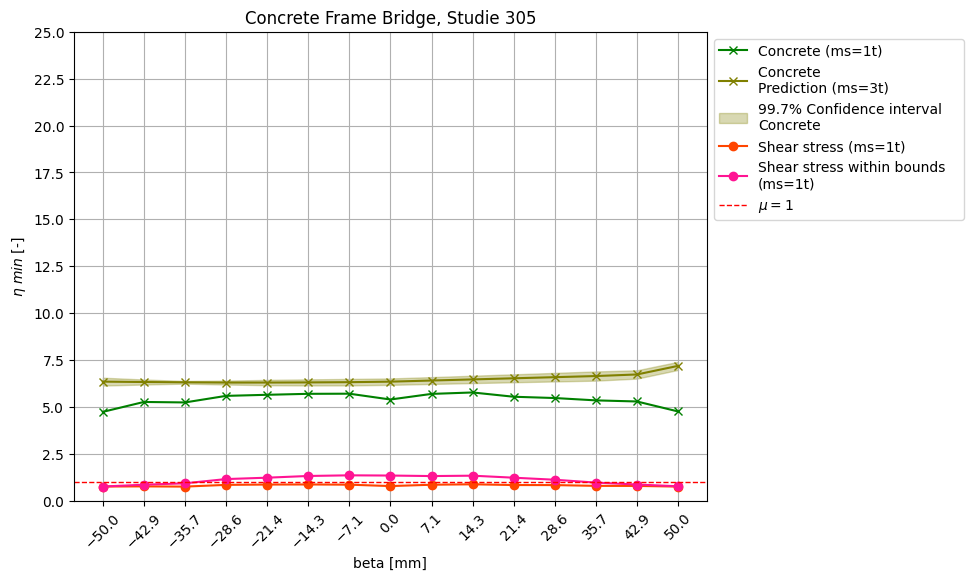

In [58]:
cm = 1/2.54

fig, ax = plt.subplots(figsize=(25*cm,15*cm))

#Bending
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_c'], label='Concrete (ms=1t)', marker='x', color='green')

#Prediction
ax.plot(df_xy_1[var_par], val_mean_pred_1d[:,0], label='Concrete \nPrediction (ms=3t)', marker='x', color='olive')

#Confidence
ax.fill_between(df_xy_1[var_par], val_mean_pred_1d[:,0] - 3*val_std_pred_1d[:,0], val_mean_pred_1d[:,0] + 3*val_std_pred_1d[:,0], label = "99.7% Confidence interval \nConcrete", color = "olive", alpha = 0.3)

#Shear
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear'],label='Shear stress (ms=1t)', marker='o', color='orangered')
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear_reduced'],label='Shear stress within bounds   \n(ms=1t)', marker='o', color='deeppink')

ax.set(xlabel=var_par+unit, ylabel='$\eta \ min$ [-]',
       title='Concrete Frame Bridge, Studie {}'.format(idx_s1))

upper_lim = 25

ax.set_ylim(bottom=0,top=upper_lim)
ax.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\mu=1$')

ax.set_xticks(df_xy_1[var_par])
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45)

ax.set_yticks(np.linspace(0,upper_lim,11))

ax.grid()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()

## 5.  1D Parameter study validation

Here we plot the 1D paraemter studies calculated with the parameteric NLFE-Analysis-Pipeline against the mean prediction of the trained BNN model. Additionally we plot the uncertanty of the prediction.

# FROM HERE below noch nicht aufgeräumt
#TODO ADD Antoines Validation plots here and add parameterstudie zu data folder

##### L-Parameter study

In [275]:
#import validation data
df_1d_L=pd.read_csv("TestData\\601_CFB_xy.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'TestData\\601_CFB_xy.csv'

In [25]:
x_data_1d=df_1d_L[x_names]
x_tensor_1d=torch.tensor(x_data_1d.values, dtype=torch.float32)

y_data_1d=df_1d_L[y_names]
y_tensor_1d = torch.tensor(y_data_1d.values,dtype=torch.float32)


x_data_1d.head()

NameError: name 'df_1d_L' is not defined

In [379]:
## normalise imoirted data
# Convert tensors to numpy arrays
x_data_1d_to_scale = x_tensor_1d.numpy()


# Scale the validation data using the same scaler as for fitted for the trainings set
x_data_1d_scaled = scaler.transform(x_data_1d_to_scale)

# Convert the scaled arrays back to tensors
x_tensor_1d_scaled = torch.tensor(x_data_1d_scaled, dtype=torch.float32)


print(x_tensor_1d_scaled)
print(y_tensor_1d)

tensor([[-1.0651e-04,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.0305e-02,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 4.0718e-02,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 6.1130e-02,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 8.1542e-02

c:\Users\kuhnso\AppData\Local\anaconda3\envs\BNNs\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [380]:
from model import predict
mean_values, std_values=predict(model=model, x_scaled=x_tensor_1d_scaled, n=10000)

In [381]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)

rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, verbalize=True)
rmse_range=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, y_range=(0,5), verbalize=True)


Root Mean Squared Error (RMSE): 2.4198782444000244
A range is provided.
Root Mean Squared Error (RMSE): 1.6105395555496216


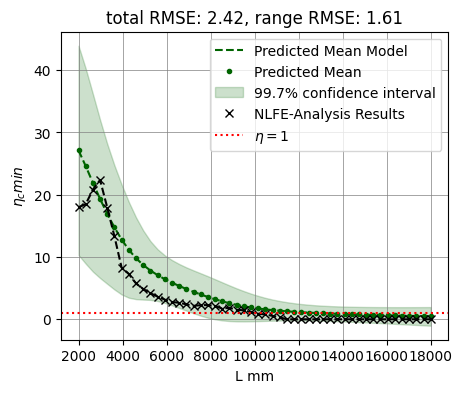

In [382]:
from plotting import single_para_strudy_perf

#x=torch.unsqueeze(x_tensor_1d[:, 2], dim=1).data.numpy()
variable='L'
unit='mm'
x=np.array(x_data_1d[variable]).reshape(-1,1)
y_pred=mean_values.reshape(-1,1)
y_true=y_tensor_1d.data.numpy()
y_std=std_values.reshape(-1,1)

single_para_strudy_perf(x, y_pred, y_true, y_std, variable=variable, unit=unit, rmse=rmse.item(),rmse_range=rmse_range.item())

##### t_p-Parameter study

In [383]:
#import validation data
df_1d_tp=pd.read_csv("TestData\\602_CFB_xy.csv")

x_data_1d=df_1d_tp[x_names]
x_tensor_1d=torch.tensor(x_data_1d.values, dtype=torch.float32)

y_data_1d=df_1d_tp[y_names]
y_tensor_1d = torch.tensor(y_data_1d.values,dtype=torch.float32)


x_tensor_1d

tensor([[5.8000e+03, 9.7200e+03, 2.0000e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.2041e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.4082e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.6122e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.8163e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000

In [384]:
## normalise imoirted data
# Convert tensors to numpy arrays
x_data_1d_to_scale = x_tensor_1d.numpy()


# Scale the validation data using the same scaler as for fitted for the trainings set
x_data_1d_scaled = scaler.transform(x_data_1d_to_scale)

# Convert the scaled arrays back to tensors
x_tensor_1d_scaled = torch.tensor(x_data_1d_scaled, dtype=torch.float32)


print(x_tensor_1d_scaled)
print(y_tensor_1d)

tensor([[ 2.3744e-01,  3.9531e-01, -6.5972e-05,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01,  3.9531e-01,  2.0349e-02,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01,  3.9531e-01,  4.0763e-02,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01,  3.9531e-01,  6.1178e-02,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01

c:\Users\kuhnso\AppData\Local\anaconda3\envs\BNNs\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [385]:
from model import predict
mean_values, std_values=predict(model=model, x_scaled=x_tensor_1d_scaled, n=1000)

In [386]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)

rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, verbalize=True)
rmse_range=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, y_range=(0,5), verbalize=True)


Root Mean Squared Error (RMSE): 6.240512847900391
A range is provided.
Root Mean Squared Error (RMSE): 3.5423126220703125


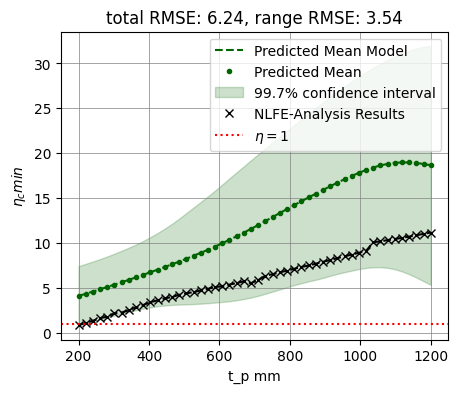

In [387]:
from plotting import single_para_strudy_perf

variable='t_p'
unit='mm'
x=np.array(x_data_1d[variable]).reshape(-1,1)
y_pred=mean_values.reshape(-1,1)
y_true=y_tensor_1d.data.numpy()
y_std=std_values.reshape(-1,1)

single_para_strudy_perf(x, y_pred, y_true, y_std, variable=variable, unit=unit, rmse=rmse.item(),rmse_range=rmse_range.item())